In [1]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
all_indicator_data = pd.read_csv('../data/all_indicators.csv')

In [3]:
indicators_filtered = all_indicator_data[all_indicator_data['Self-Reported General Health Assessment Poor or Fair'].notna()].copy()

In [4]:
indicators_filtered = indicators_filtered.drop(columns=['CES 4.0 Percentile Range'])

In [5]:
imputer = IterativeImputer(random_state=100, max_iter=10)
imputer.fit(indicators_filtered)
imputed_values = imputer.transform(indicators_filtered)

C:\Users\isaac\anaconda3\envs\geo\lib\site-packages\sklearn\impute\_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [6]:
indicators_filtered.loc[:, indicators_filtered.columns] = imputed_values

In [7]:
reduced_columns = list(filter(lambda c: not ('Pctl' in c and ' '.join(c.split(' ')[:-1]) in indicators_filtered.columns), indicators_filtered.columns))
indicators_filtered = indicators_filtered[reduced_columns] 

In [8]:
indicators_filtered.columns

Index(['tract', 'Adults who are Sedentary',
       'Adults who have had a Routine Checkup', 'Adults with COPD',
       'Children with Low Access to a Grocery Store (% of Total Pop)',
       'Income Inequality', 'Low-Income and Low Access to a Grocery Store',
       'Overcrowded Households',
       'Self-Reported General Health Assessment Poor or Fair',
       'Workers Commuting by Public Transportation',
       'Workers who Walk to Work', 'Total Population', 'CES 4.0 Score',
       'CES 4.0 Percentile', 'Ozone', 'PM2.5', 'Diesel PM', 'Drinking Water',
       'Lead', 'Pesticides', 'Tox. Release', 'Traffic', 'Cleanup Sites',
       'Groundwater Threats', 'Haz. Waste', 'Imp. Water Bodies', 'Solid Waste',
       'Pollution Burden', 'Pollution Burden Score', 'Asthma',
       'Low Birth Weight', 'Cardiovascular Disease', 'Education',
       'Linguistic Isolation', 'Poverty', 'Unemployment', 'Housing Burden',
       'Pop. Char. ', 'Pop. Char. Score', 'Pop. Char. Pctl'],
      dtype='object')

In [9]:
indicators_filtered.corr()

,tract,Adults who are Sedentary,Adults who have had a Routine Checkup,Adults with COPD,Children with Low Access to a Grocery Store (% of Total Pop),Income Inequality,Low-Income and Low Access to a Grocery Store,Overcrowded Households,Self-Reported General Health Assessment Poor or Fair,Workers Commuting by Public Transportation,...,Low Birth Weight,Cardiovascular Disease,Education,Linguistic Isolation,Poverty,Unemployment,Housing Burden,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
tract,1.000000,-0.213338,-0.003499,0.113616,-0.093428,-0.158559,-0.159707,0.017497,-0.085736,-0.382718,...,-0.102552,-0.206641,-0.014147,-0.207715,-0.206842,-0.045469,-0.161530,-0.270922,-0.270922,-0.267625
Adults who are Sedentary,-0.213338,1.000000,-0.412435,0.392947,-0.364363,-0.106937,-0.292644,0.217541,0.939751,0.096547,...,-0.111690,0.320115,0.512202,0.584554,0.676179,0.430750,0.429315,0.538901,0.538900,0.533979
Adults who have had a Routine Checkup,-0.003499,-0.412435,1.000000,0.074850,0.280749,0.265983,0.225689,-0.438075,-0.407919,-0.437055,...,0.171794,-0.075726,-0.466989,-0.414272,-0.510432,-0.376758,-0.615097,-0.412982,-0.412981,-0.414705
Adults with COPD,0.113616,0.392947,0.074850,1.000000,-0.038403,0.071419,0.003722,-0.060976,0.579871,-0.405847,...,-0.200640,0.027121,0.191417,-0.079990,0.166903,0.259048,0.009514,-0.000790,-0.000790,-0.001156
Children with Low Access to a Grocery Store (% of Total Pop),-0.093428,-0.364363,0.280749,-0.038403,1.000000,0.469636,0.949793,-0.166158,-0.340356,-0.025078,...,0.126524,-0.420802,-0.034539,-0.248682,-0.207856,-0.162225,-0.130827,-0.222997,-0.222996,-0.221192
Income Inequality,-0.158559,-0.106937,0.265983,0.071419,0.469636,1.000000,0.503187,-0.105281,-0.100525,-0.150211,...,0.206568,0.046490,-0.185288,-0.022331,0.179240,-0.117815,0.027270,0.134182,0.134182,0.138219
Low-Income and Low Access to a Grocery Store,-0.159707,-0.292644,0.225689,0.003722,0.949793,0.503187,1.000000,-0.146703,-0.255642,-0.022767,...,0.087049,-0.373979,-0.022155,-0.263721,-0.132245,-0.082396,-0.071345,-0.176015,-0.176014,-0.173461
Overcrowded Households,0.017497,0.217541,-0.438075,-0.060976,-0.166158,-0.105281,-0.146703,1.000000,0.185546,0.395983,...,-0.007400,-0.050760,0.319421,0.291073,0.231193,0.259127,0.399604,0.259578,0.259577,0.259699
Self-Reported General Health Assessment Poor or Fair,-0.085736,0.939751,-0.407919,0.579871,-0.340356,-0.100525,-0.255642,0.185546,1.000000,-0.051812,...,-0.242855,0.318015,0.491909,0.470015,0.673111,0.476480,0.430698,0.454407,0.454406,0.450504
Workers Commuting by Public Transportation,-0.382718,0.096547,-0.437055,-0.405847,-0.025078,-0.150211,-0.022767,0.395983,-0.051812,1.000000,...,-0.015943,0.010347,0.373398,0.196016,0.229537,-0.010972,0.396812,0.284599,0.284600,0.283466


In [10]:
lm = LinearRegression()

outcome = 'Self-Reported General Health Assessment Poor or Fair'
y = indicators_filtered[outcome]
X = indicators_filtered.drop(columns=[outcome, 'tract'])

lm.fit(X, y)

w = lm.coef_
idx = np.argsort(w)[::-1]

for i in idx:
    print(f"{X.columns[i]}: {round(w[i], 3)}")

Diesel PM: 23.426
Pop. Char. Pctl: 5.956
Low Birth Weight: 5.182
CES 4.0 Percentile: 3.158
Children with Low Access to a Grocery Store (% of Total Pop): 3.031
Asthma: 1.651
Housing Burden: 1.27
Poverty: 1.231
Solid Waste: 1.027
Education: 0.963
Unemployment: 0.908
Linguistic Isolation: 0.717
Cleanup Sites: 0.552
Tox. Release: 0.127
Adults who have had a Routine Checkup: 0.06
Traffic: 0.003
Total Population: 0.001
Drinking Water: -0.009
Lead: -0.03
Pollution Burden Score: -0.041
Adults with COPD: -0.048
Groundwater Threats: -0.056
Ozone: -0.08
Overcrowded Households: -0.107
Income Inequality: -0.145
Pesticides: -0.369
Workers Commuting by Public Transportation: -0.527
Pollution Burden: -0.888
Adults who are Sedentary: -1.024
Workers who Walk to Work: -1.026
Pop. Char. Score: -1.206
Imp. Water Bodies: -1.479
Haz. Waste: -1.989
Cardiovascular Disease: -4.263
CES 4.0 Score: -4.431
Low-Income and Low Access to a Grocery Store: -5.683
Pop. Char. : -11.557
PM2.5: -55.307


In [11]:
len(indicators_filtered.columns)

40

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Code credit: https://stackoverflow.com/questions/48139899/correlation-matrix-plot-with-coefficients-on-one-side-scatterplots-on-another

sns.set(style='white')

def corrfunc(x, y, **kws):
    r, p = stats.pearsonr(x, y)
    p_stars = ''
    if p <= 0.05:
        p_stars = '*'
    if p <= 0.01:
        p_stars = '**'
    if p <= 0.001:
        p_stars = '***'
    ax = plt.gca()
    ax.annotate('r = {:.2f} '.format(r) + p_stars, xy=(0.05, 0.9), xycoords=ax.transAxes)

def annotate_colname(x, **kws):
    ax = plt.gca()
    ax.annotate(x.name, xy=(0.05, 0.9), xycoords=ax.transAxes, fontweight='bold')

def cor_matrix(df):
    grid = sns.PairGrid(df, palette=['red'])
    # Use normal regplot as `lowess=True` doesn't provide CIs.
    grid.map_upper(sns.regplot, scatter_kws={'s':10})
    grid.map_diag(sns.histplot, kde=True, kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4))
    grid.map_diag(annotate_colname)
    grid.map_lower(sns.kdeplot, cmap='Blues_d')
    grid.map_lower(corrfunc)
    # Remove axis labels, as they're in the diagonals.
    for ax in grid.axes.flatten():
        ax.set_ylabel('')
        ax.set_xlabel('')
    return grid

C:\Users\isaac\anaconda3\envs\geo\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\isaac\anaconda3\envs\geo\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\isaac\anaconda3\envs\geo\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\isaac\anaconda3\envs\geo\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\isaac\anaconda3\envs\geo\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\isaac\anaconda3\envs\geo\lib\site-packages\seaborn\axisg

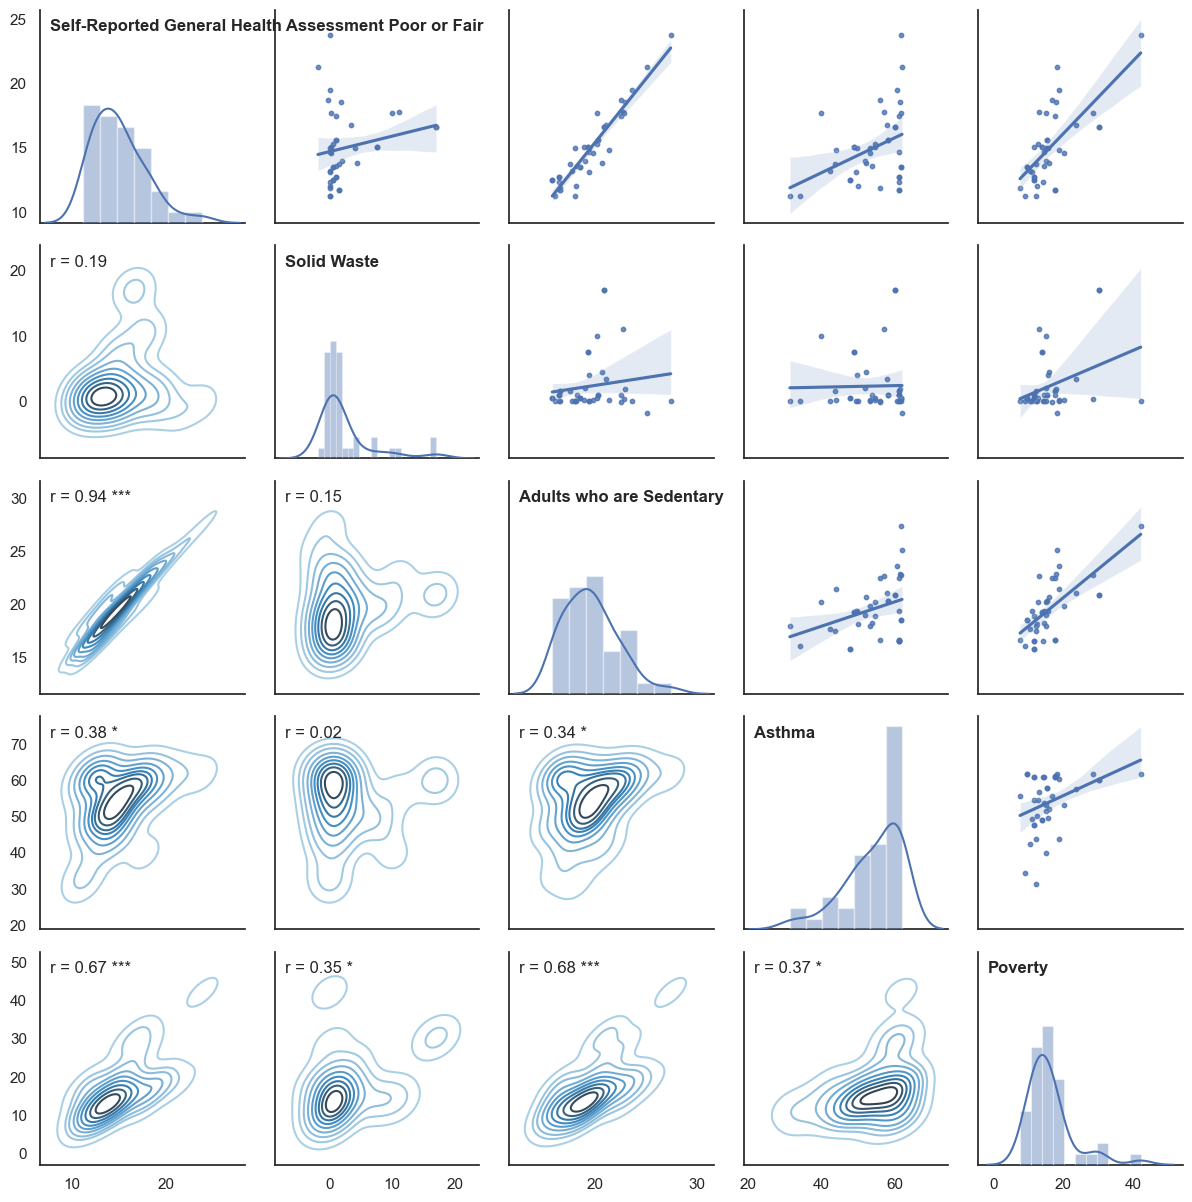

In [13]:
cor_matrix(indicators_filtered[[outcome, 'Solid Waste', 'Adults who are Sedentary', 'Asthma', 'Poverty']])

- Try variable selection
- For overlapping indicators, choose most granular
- Weird weights may be due to collinearity
- Narrow down manually first, then use a selection algorithm

In [24]:
exclusions = ['CES 4.0 Percentile', 'Pop. Char. ', 'Pop. Char. Pctl', 'PM2.5', 'Diesel PM']
indicators_filtered = indicators_filtered.drop(columns=exclusions)

In [15]:
indicators_filtered.columns

Index(['tract', 'Adults who are Sedentary',
       'Adults who have had a Routine Checkup', 'Adults with COPD',
       'Children with Low Access to a Grocery Store (% of Total Pop)',
       'Income Inequality', 'Low-Income and Low Access to a Grocery Store',
       'Overcrowded Households',
       'Self-Reported General Health Assessment Poor or Fair',
       'Workers Commuting by Public Transportation',
       'Workers who Walk to Work', 'Total Population', 'CES 4.0 Score',
       'CES 4.0 Percentile', 'Ozone', 'PM2.5', 'Diesel PM', 'Drinking Water',
       'Lead', 'Pesticides', 'Tox. Release', 'Traffic', 'Cleanup Sites',
       'Groundwater Threats', 'Haz. Waste', 'Imp. Water Bodies', 'Solid Waste',
       'Pollution Burden', 'Pollution Burden Score', 'Asthma',
       'Low Birth Weight', 'Cardiovascular Disease', 'Education',
       'Linguistic Isolation', 'Poverty', 'Unemployment', 'Housing Burden',
       'Pop. Char. ', 'Pop. Char. Score', 'Pop. Char. Pctl'],
      dtype='object')

In [16]:
def calculate_nbic(model, X, y):
    n = len(y)
    k = X.shape[1]
    rss = np.sum((y - model.predict(X)) ** 2)
    bic = n * np.log(rss / n) + k * np.log(n)
    return -bic

In [25]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

lm = Lasso()

outcome = 'Self-Reported General Health Assessment Poor or Fair'
y = indicators_filtered[outcome]
X = indicators_filtered.drop(columns=[outcome, 'tract'])

lm.fit(X, y)

sfm = SelectFromModel(lm)
X_reduced = sfm.transform(X) 

# lm.fit(X_reduced, y)

w = lm.coef_
idx = np.argsort(np.abs(w))[::-1]

for i in idx:
    print(f"{X.columns[i]}: {round(w[i], 3)}")

Adults who are Sedentary: 0.46
Poverty: 0.12
Lead: 0.048
Pollution Burden: 0.036
Workers Commuting by Public Transportation: -0.035
Pesticides: 0.023
Asthma: 0.015
Groundwater Threats: -0.015
Overcrowded Households: 0.009
Cleanup Sites: 0.006
Drinking Water: 0.002
Traffic: -0.001
Total Population: -0.0
Imp. Water Bodies: -0.0
Adults who have had a Routine Checkup: -0.0
Adults with COPD: 0.0
Children with Low Access to a Grocery Store (% of Total Pop): -0.0
Income Inequality: 0.0
Low-Income and Low Access to a Grocery Store: -0.0
Unemployment: 0.0
Linguistic Isolation: 0.0
Workers who Walk to Work: -0.0
CES 4.0 Score: 0.0
Haz. Waste: 0.0
Ozone: 0.0
Education: -0.0
Cardiovascular Disease: 0.0
Low Birth Weight: -0.0
Tox. Release: -0.0
Housing Burden: -0.0
Pollution Burden Score: 0.0
Solid Waste: 0.0
Pop. Char. Score: 0.0


C:\Users\isaac\anaconda3\envs\geo\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [26]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

lm = Lasso()

outcome = 'Asthma'
y = indicators_filtered[outcome]
X = indicators_filtered.drop(columns=[outcome, 'tract'])

lm.fit(X, y)

sfm = SelectFromModel(lm)
X_reduced = sfm.transform(X) 

# lm.fit(X_reduced, y)

w = lm.coef_
idx = np.argsort(np.abs(w))[::-1]

for i in idx:
    print(f"{X.columns[i]}: {round(w[i], 3)}")

Cardiovascular Disease: 3.365
Children with Low Access to a Grocery Store (% of Total Pop): -0.398
Cleanup Sites: -0.09
Education: -0.087
CES 4.0 Score: 0.087
Tox. Release: 0.071
Overcrowded Households: -0.064
Lead: 0.043
Housing Burden: 0.031
Pesticides: 0.03
Groundwater Threats: 0.017
Drinking Water: -0.008
Pollution Burden: -0.006
Traffic: -0.001
Total Population: -0.0
Adults with COPD: 0.0
Income Inequality: 0.0
Low-Income and Low Access to a Grocery Store: -0.0
Workers Commuting by Public Transportation: -0.0
Adults who have had a Routine Checkup: 0.0
Workers who Walk to Work: -0.0
Self-Reported General Health Assessment Poor or Fair: 0.0
Pop. Char. Score: 0.0
Ozone: -0.0
Haz. Waste: 0.0
Imp. Water Bodies: 0.0
Solid Waste: -0.0
Pollution Burden Score: -0.0
Low Birth Weight: 0.0
Linguistic Isolation: -0.0
Poverty: 0.0
Unemployment: -0.0
Adults who are Sedentary: 0.0


C:\Users\isaac\anaconda3\envs\geo\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
